In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.insert(0, os.environ['PLOT_SETTINGS_DIR'])
import plot_settings
from glob import glob
from pathlib import Path
import json

In [13]:
df

,time(s),iter,inner_iter,infeas,ot_objective,primal,dual,solver,config
0,0.004759,1,20,0.598778,0.177419,1.374975,0.000000,dual_extrap,config_1.json
1,0.438462,101,2020,0.061650,0.161766,0.285067,-0.701739,dual_extrap,config_1.json
2,0.865550,201,4020,0.010309,0.150174,0.170791,-0.505702,dual_extrap,config_1.json
3,1.294922,301,6020,0.017893,0.139212,0.174998,-0.268972,dual_extrap,config_1.json
4,1.724050,401,8020,0.005730,0.129275,0.140734,-0.202274,dual_extrap,config_1.json
...,...,...,...,...,...,...,...,...,...
95,58.837741,9501,285030,0.000228,0.008240,0.008696,-0.000898,dual_extrap,config_59.json
96,59.454224,9601,288030,0.000226,0.008178,0.008629,-0.000879,dual_extrap,config_59.json
97,60.061121,9701,291030,0.000223,0.008117,0.008563,-0.000860,dual_extrap,config_59.json
98,60.676927,9801,294030,0.000221,0.008057,0.008499,-0.000842,dual_extrap,config_59.json


<Axes: xlabel='tau_p', ylabel='pd_gap'>

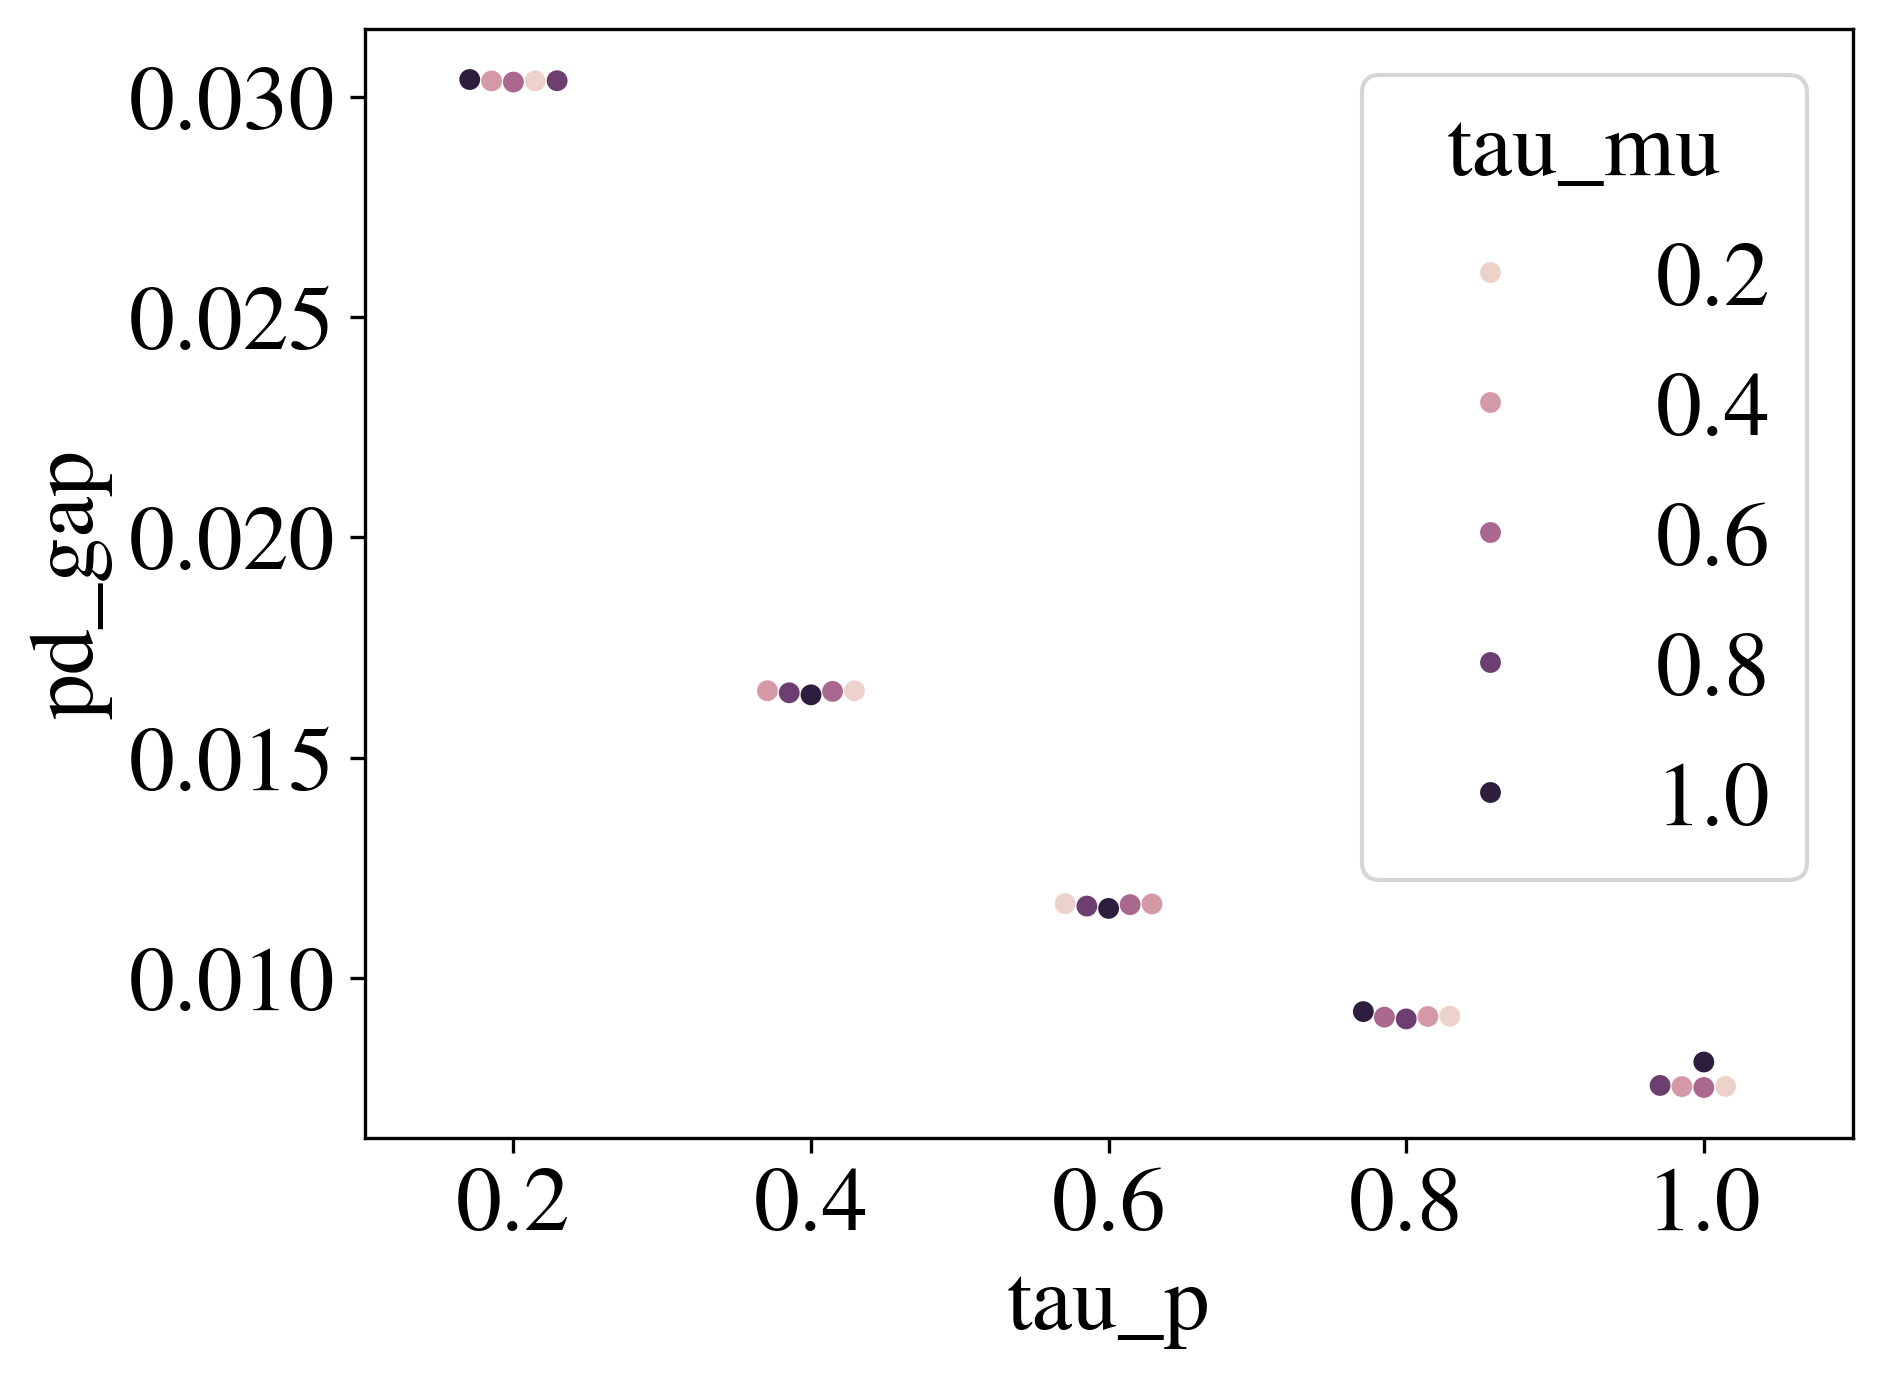

In [32]:
data = []
for i in glob("../config*.out"):
    df = pd.read_csv(i)
    df['config'] = Path(i).stem
    data.append(df)
df = pd.concat(data)
for i in glob("../configurations/extrapolation_tuning/*"):
    fname = f"{Path(i).stem}.json"
    with open(f"../configurations/extrapolation_tuning/{fname}") as inf:
        data = json.loads(inf.read())
    df.loc[df['config'] == fname,'tau_p'] = data['tau_p']
    df.loc[df['config'] == fname,'tau_mu'] = data['tau_mu']
    df.loc[df['config'] == fname,'inner_iter_lim'] = data['inner_iter']
df['pd_gap'] = df['primal'] - df['dual']
last_df = df.sort_values(by='iter', ascending=False).drop_duplicates(subset=['tau_p', "tau_mu", "inner_iter_lim"])

last_df.sort_values(by='pd_gap')
sns.swarmplot(last_df.query('inner_iter_lim==10'), x='tau_p', y='pd_gap', hue='tau_mu')

In [23]:
df['inner_iter_lim'].unique()

array([10.,  5., 15.])